In [143]:
#!pip install scikit-learn

In [144]:
#!pip install xgboost

In [145]:
#!pip install lightgbm 

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc
from sklearn.metrics import roc_curve, roc_auc_score, balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [147]:
df = pd.read_csv('car_loan_class.csv')

In [148]:
df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,MOBILENO_AVL_FLAG,PRI_CURRENT_BALANCE,PRIMARY_INSTAL_AMT,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,1,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,1,27600,1991,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,1,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,1,0,31,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,1,0,0,0yrs 0mon,0yrs 0mon,1,1


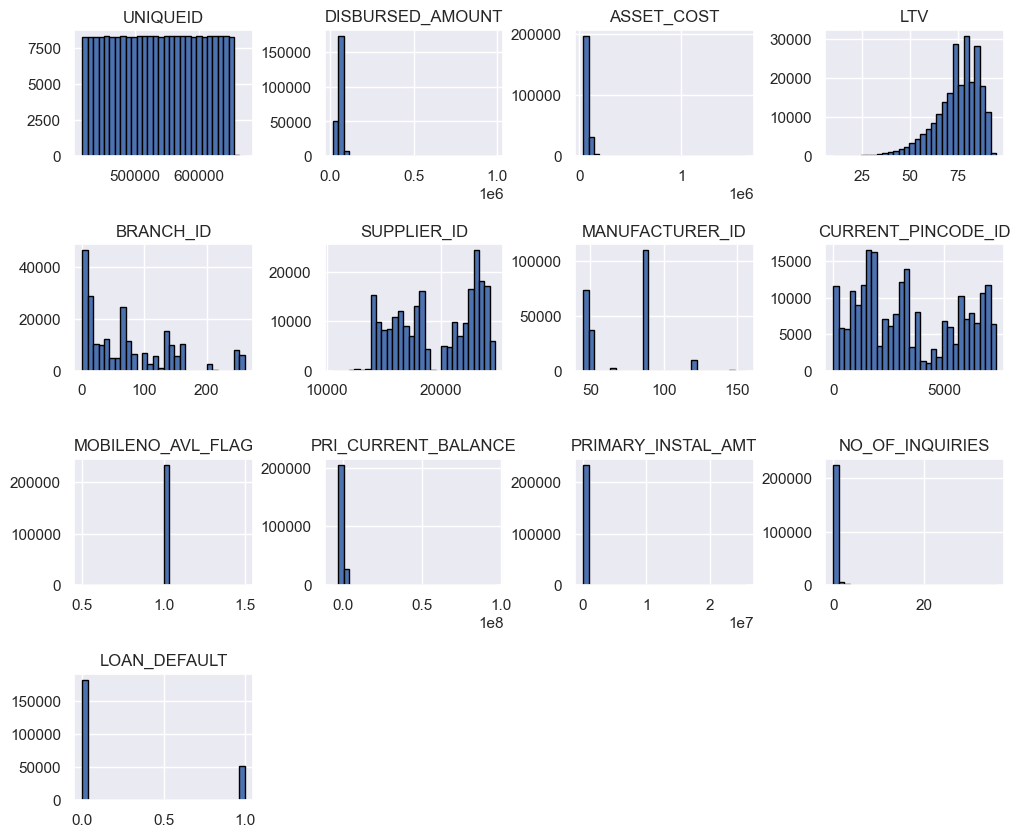

In [149]:
df.hist(figsize=(12,10), bins=30, edgecolor='black')
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
train, test = train_test_split (df, test_size=0.2, random_state=123)

In [152]:
train.reset_index(drop=True, inplace=True)
train

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,MOBILENO_AVL_FLAG,PRI_CURRENT_BALANCE,PRIMARY_INSTAL_AMT,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,624819,45149,63772,73.39,3,14112,45,86,10-07-1992,Salaried,1,2423,1213,0yrs 4mon,0yrs 4mon,1,0
1,642360,63213,75296,85.00,2,14834,86,1713,21-03-1987,Salaried,1,2615,0,2yrs 5mon,5yrs 7mon,0,0
2,604430,82183,113426,74.94,3,17038,51,577,01-01-1967,Salaried,1,444310,1732,0yrs 5mon,0yrs 10mon,2,0
3,491427,54889,71617,79.59,5,18089,86,3331,04-05-1959,Self employed,1,0,0,0yrs 0mon,0yrs 0mon,0,0
4,647782,55489,67590,87.29,162,14166,86,1869,15-01-1976,Self employed,1,166061,2560,0yrs 9mon,2yrs 0mon,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186518,565931,54427,71914,78.45,254,23311,86,6734,22-01-1991,Self employed,1,72321,5806,1yrs 0mon,1yrs 11mon,0,1
186519,428915,49678,62537,82.51,85,17142,45,2036,21-08-1967,Salaried,1,20,0,3yrs 11mon,3yrs 11mon,1,1
186520,515580,38388,64538,61.98,63,17066,86,7083,07-12-1975,Self employed,1,0,0,0yrs 0mon,0yrs 0mon,0,0
186521,576870,48349,67845,72.22,48,21838,86,6297,20-07-1988,Salaried,1,89346,0,2yrs 6mon,2yrs 6mon,0,0


In [153]:
#Action1 - Remove unrequired column
train.drop(['UNIQUEID', 'BRANCH_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID'], axis = 1, inplace=True)

In [154]:
train

,DISBURSED_AMOUNT,ASSET_COST,LTV,DATE_OF_BIRTH,EMPLOYMENT_TYPE,MOBILENO_AVL_FLAG,PRI_CURRENT_BALANCE,PRIMARY_INSTAL_AMT,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,45149,63772,73.39,10-07-1992,Salaried,1,2423,1213,0yrs 4mon,0yrs 4mon,1,0
1,63213,75296,85.00,21-03-1987,Salaried,1,2615,0,2yrs 5mon,5yrs 7mon,0,0
2,82183,113426,74.94,01-01-1967,Salaried,1,444310,1732,0yrs 5mon,0yrs 10mon,2,0
3,54889,71617,79.59,04-05-1959,Self employed,1,0,0,0yrs 0mon,0yrs 0mon,0,0
4,55489,67590,87.29,15-01-1976,Self employed,1,166061,2560,0yrs 9mon,2yrs 0mon,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
186518,54427,71914,78.45,22-01-1991,Self employed,1,72321,5806,1yrs 0mon,1yrs 11mon,0,1
186519,49678,62537,82.51,21-08-1967,Salaried,1,20,0,3yrs 11mon,3yrs 11mon,1,1
186520,38388,64538,61.98,07-12-1975,Self employed,1,0,0,0yrs 0mon,0yrs 0mon,0,0
186521,48349,67845,72.22,20-07-1988,Salaried,1,89346,0,2yrs 6mon,2yrs 6mon,0,0


In [155]:
train.isnull().sum()

DISBURSED_AMOUNT            0
ASSET_COST                  0
LTV                         0
DATE_OF_BIRTH               0
EMPLOYMENT_TYPE          6129
MOBILENO_AVL_FLAG           0
PRI_CURRENT_BALANCE         0
PRIMARY_INSTAL_AMT          0
AVERAGE_ACCT_AGE            0
CREDIT_HISTORY_LENGTH       0
NO_OF_INQUIRIES             0
LOAN_DEFAULT                0
dtype: int64

In [156]:
#Action2 - drop missing values
train.dropna(subset=['EMPLOYMENT_TYPE'],  inplace =True)

In [157]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180394 entries, 0 to 186522
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DISBURSED_AMOUNT       180394 non-null  int64  
 1   ASSET_COST             180394 non-null  int64  
 2   LTV                    180394 non-null  float64
 3   DATE_OF_BIRTH          180394 non-null  object 
 4   EMPLOYMENT_TYPE        180394 non-null  object 
 5   MOBILENO_AVL_FLAG      180394 non-null  int64  
 6   PRI_CURRENT_BALANCE    180394 non-null  int64  
 7   PRIMARY_INSTAL_AMT     180394 non-null  int64  
 8   AVERAGE_ACCT_AGE       180394 non-null  object 
 9   CREDIT_HISTORY_LENGTH  180394 non-null  object 
 10  NO_OF_INQUIRIES        180394 non-null  int64  
 11  LOAN_DEFAULT           180394 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 17.9+ MB


In [158]:
train.isnull().sum()

DISBURSED_AMOUNT         0
ASSET_COST               0
LTV                      0
DATE_OF_BIRTH            0
EMPLOYMENT_TYPE          0
MOBILENO_AVL_FLAG        0
PRI_CURRENT_BALANCE      0
PRIMARY_INSTAL_AMT       0
AVERAGE_ACCT_AGE         0
CREDIT_HISTORY_LENGTH    0
NO_OF_INQUIRIES          0
LOAN_DEFAULT             0
dtype: int64

In [159]:
#Action3 - convert date column to date time format
train['DATE_OF_BIRTH'] = pd.to_datetime(train['DATE_OF_BIRTH'], format='mixed')
train['DATE_OF_BIRTH']

0        1992-10-07
1        1987-03-21
2        1967-01-01
3        1959-04-05
4        1976-01-15
            ...    
186518   1991-01-22
186519   1967-08-21
186520   1975-07-12
186521   1988-07-20
186522   1985-02-18
Name: DATE_OF_BIRTH, Length: 180394, dtype: datetime64[ns]

In [160]:
#Action4 - extracting year of birth from date of birth column
train['BIRTH_YEAR'] = train['DATE_OF_BIRTH'].dt.year
train

,DISBURSED_AMOUNT,ASSET_COST,LTV,DATE_OF_BIRTH,EMPLOYMENT_TYPE,MOBILENO_AVL_FLAG,PRI_CURRENT_BALANCE,PRIMARY_INSTAL_AMT,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,BIRTH_YEAR
0,45149,63772,73.39,1992-10-07,Salaried,1,2423,1213,0yrs 4mon,0yrs 4mon,1,0,1992
1,63213,75296,85.00,1987-03-21,Salaried,1,2615,0,2yrs 5mon,5yrs 7mon,0,0,1987
2,82183,113426,74.94,1967-01-01,Salaried,1,444310,1732,0yrs 5mon,0yrs 10mon,2,0,1967
3,54889,71617,79.59,1959-04-05,Self employed,1,0,0,0yrs 0mon,0yrs 0mon,0,0,1959
4,55489,67590,87.29,1976-01-15,Self employed,1,166061,2560,0yrs 9mon,2yrs 0mon,0,0,1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186518,54427,71914,78.45,1991-01-22,Self employed,1,72321,5806,1yrs 0mon,1yrs 11mon,0,1,1991
186519,49678,62537,82.51,1967-08-21,Salaried,1,20,0,3yrs 11mon,3yrs 11mon,1,1,1967
186520,38388,64538,61.98,1975-07-12,Self employed,1,0,0,0yrs 0mon,0yrs 0mon,0,0,1975
186521,48349,67845,72.22,1988-07-20,Salaried,1,89346,0,2yrs 6mon,2yrs 6mon,0,0,1988


In [161]:
#Action5 - extracting age from year of birth column
train['AGE'] = 2023 - train['BIRTH_YEAR']
train

,DISBURSED_AMOUNT,ASSET_COST,LTV,DATE_OF_BIRTH,EMPLOYMENT_TYPE,MOBILENO_AVL_FLAG,PRI_CURRENT_BALANCE,PRIMARY_INSTAL_AMT,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,BIRTH_YEAR,AGE
0,45149,63772,73.39,1992-10-07,Salaried,1,2423,1213,0yrs 4mon,0yrs 4mon,1,0,1992,31
1,63213,75296,85.00,1987-03-21,Salaried,1,2615,0,2yrs 5mon,5yrs 7mon,0,0,1987,36
2,82183,113426,74.94,1967-01-01,Salaried,1,444310,1732,0yrs 5mon,0yrs 10mon,2,0,1967,56
3,54889,71617,79.59,1959-04-05,Self employed,1,0,0,0yrs 0mon,0yrs 0mon,0,0,1959,64
4,55489,67590,87.29,1976-01-15,Self employed,1,166061,2560,0yrs 9mon,2yrs 0mon,0,0,1976,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186518,54427,71914,78.45,1991-01-22,Self employed,1,72321,5806,1yrs 0mon,1yrs 11mon,0,1,1991,32
186519,49678,62537,82.51,1967-08-21,Salaried,1,20,0,3yrs 11mon,3yrs 11mon,1,1,1967,56
186520,38388,64538,61.98,1975-07-12,Self employed,1,0,0,0yrs 0mon,0yrs 0mon,0,0,1975,48
186521,48349,67845,72.22,1988-07-20,Salaried,1,89346,0,2yrs 6mon,2yrs 6mon,0,0,1988,35


In [162]:
#Creating a functon to convert year and months to all months (where data=the dataset and feature=column to be converted)

def mon_conv(data, feature):
    new = []
    for i in data[feature].values:
        yr,mn = i.split(" ")
        a = int(yr[0:-3])
        b = int(mn[0:-3])
        c = (a*12+b)
        new.append(c)
    data[feature] = new
    return data[feature]

In [163]:
#Action6 - converting the AVERAGE_ACCT_AGE column to months only
mon_conv(train,'AVERAGE_ACCT_AGE')
train['AVERAGE_ACCT_AGE']

0          4
1         29
2          5
3          0
4          9
          ..
186518    12
186519    47
186520     0
186521    30
186522    11
Name: AVERAGE_ACCT_AGE, Length: 180394, dtype: int64

In [164]:
#Action7 - converting the CREDIT_HISTORY_LENGTH column to months only
mon_conv(train, 'CREDIT_HISTORY_LENGTH')
train['CREDIT_HISTORY_LENGTH']

0          4
1         67
2         10
3          0
4         24
          ..
186518    23
186519    47
186520     0
186521    30
186522    20
Name: CREDIT_HISTORY_LENGTH, Length: 180394, dtype: int64

In [165]:
train

,DISBURSED_AMOUNT,ASSET_COST,LTV,DATE_OF_BIRTH,EMPLOYMENT_TYPE,MOBILENO_AVL_FLAG,PRI_CURRENT_BALANCE,PRIMARY_INSTAL_AMT,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,BIRTH_YEAR,AGE
0,45149,63772,73.39,1992-10-07,Salaried,1,2423,1213,4,4,1,0,1992,31
1,63213,75296,85.00,1987-03-21,Salaried,1,2615,0,29,67,0,0,1987,36
2,82183,113426,74.94,1967-01-01,Salaried,1,444310,1732,5,10,2,0,1967,56
3,54889,71617,79.59,1959-04-05,Self employed,1,0,0,0,0,0,0,1959,64
4,55489,67590,87.29,1976-01-15,Self employed,1,166061,2560,9,24,0,0,1976,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186518,54427,71914,78.45,1991-01-22,Self employed,1,72321,5806,12,23,0,1,1991,32
186519,49678,62537,82.51,1967-08-21,Salaried,1,20,0,47,47,1,1,1967,56
186520,38388,64538,61.98,1975-07-12,Self employed,1,0,0,0,0,0,0,1975,48
186521,48349,67845,72.22,1988-07-20,Salaried,1,89346,0,30,30,0,0,1988,35


In [166]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories='auto', drop='first', 
    sparse=False)

In [167]:
#Action8 - encode categorical columns
train['EMPLOYMENT_TYPE']=encoder.fit_transform(train['EMPLOYMENT_TYPE'].values.reshape(-1,1))

C:\Users\Godgive Computer\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [168]:
train['EMPLOYMENT_TYPE']

0         0.0
1         0.0
2         0.0
3         1.0
4         1.0
         ... 
186518    1.0
186519    0.0
186520    1.0
186521    0.0
186522    1.0
Name: EMPLOYMENT_TYPE, Length: 180394, dtype: float64

In [169]:
#Action9 - Remove the extra columns
train.drop(['DATE_OF_BIRTH','BIRTH_YEAR'], axis =1, inplace = True)

In [170]:
train.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,EMPLOYMENT_TYPE,MOBILENO_AVL_FLAG,PRI_CURRENT_BALANCE,PRIMARY_INSTAL_AMT,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE
0,45149,63772,73.39,0.0,1,2423,1213,4,4,1,0,31
1,63213,75296,85.00,0.0,1,2615,0,29,67,0,0,36
2,82183,113426,74.94,0.0,1,444310,1732,5,10,2,0,56
3,54889,71617,79.59,1.0,1,0,0,0,0,0,0,64
4,55489,67590,87.29,1.0,1,166061,2560,9,24,0,0,47


In [171]:
#Define functons to remove outlers
def drop_outlier(data, var):
    q1, q3 = np.percentile(data[var], [25, 75])
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    data = data[data[var]< upper]
    data = data[data[var]> lower]
    data.reset_index(drop = True, inplace = True)
    return data

In [172]:
#Action10 - Remove outliers
train = drop_outlier(train, 'DISBURSED_AMOUNT')
train = drop_outlier(train, 'ASSET_COST')

In [173]:
train

,DISBURSED_AMOUNT,ASSET_COST,LTV,EMPLOYMENT_TYPE,MOBILENO_AVL_FLAG,PRI_CURRENT_BALANCE,PRIMARY_INSTAL_AMT,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE
0,45149,63772,73.39,0.0,1,2423,1213,4,4,1,0,31
1,63213,75296,85.00,0.0,1,2615,0,29,67,0,0,36
2,54889,71617,79.59,1.0,1,0,0,0,0,0,0,64
3,55489,67590,87.29,1.0,1,166061,2560,9,24,0,0,47
4,58947,86864,70.22,1.0,1,0,0,0,0,0,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...
156519,56259,67559,84.37,1.0,1,2380136,312111,14,27,0,0,37
156520,54427,71914,78.45,1.0,1,72321,5806,12,23,0,1,32
156521,49678,62537,82.51,0.0,1,20,0,47,47,1,1,56
156522,38388,64538,61.98,1.0,1,0,0,0,0,0,0,48


(array([ 3122.,  7097., 13389., 25695., 35105., 36401., 21785., 10028.,
         3308.,   594.]),
 array([27309. , 32571.4, 37833.8, 43096.2, 48358.6, 53621. , 58883.4,
        64145.8, 69408.2, 74670.6, 79933. ]),
 <BarContainer object of 10 artists>)

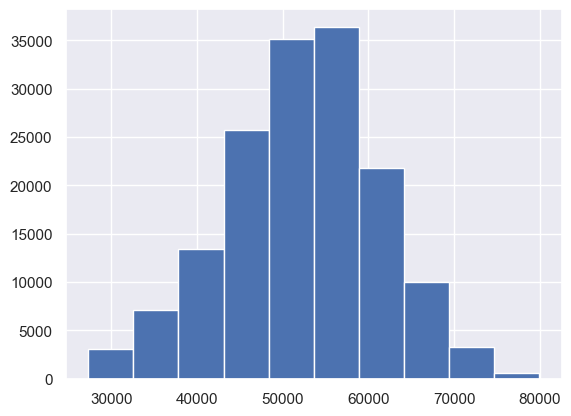

In [174]:
plt.hist(train['DISBURSED_AMOUNT'])

(array([ 1593.,  3459., 12919., 34304., 41654., 29234., 15676.,  7517.,
         5274.,  4894.]),
 array([46922. , 51883.9, 56845.8, 61807.7, 66769.6, 71731.5, 76693.4,
        81655.3, 86617.2, 91579.1, 96541. ]),
 <BarContainer object of 10 artists>)

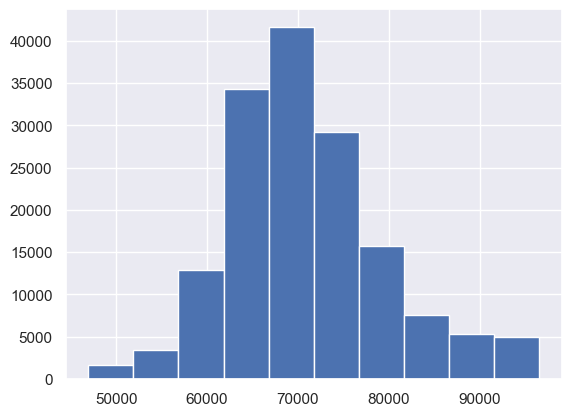

In [175]:
plt.hist(train['ASSET_COST'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f702888590>,
 'caps': [<matplotlib.lines.Line2D at 0x1f702889950>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f700bf3050>],
 'medians': [<matplotlib.lines.Line2D at 0x1f702833290>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f702812b50>],
 'means': []}

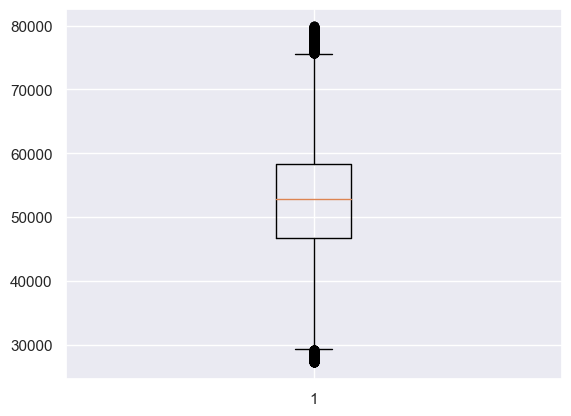

In [176]:
plt.boxplot(train['DISBURSED_AMOUNT'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f7060b6990>,
 'caps': [<matplotlib.lines.Line2D at 0x1f7060b7c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f7060b6090>],
 'medians': [<matplotlib.lines.Line2D at 0x1f7060c4cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f7016b5410>],
 'means': []}

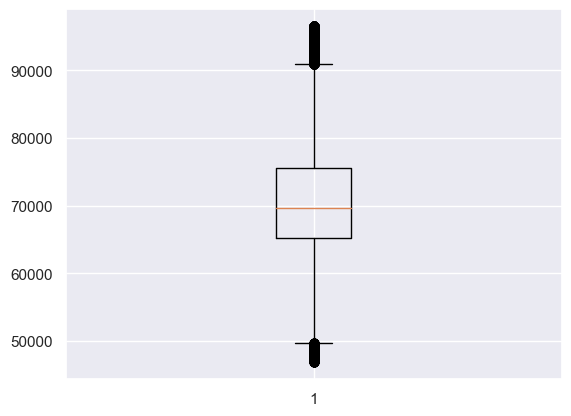

In [177]:
plt.boxplot(train['ASSET_COST'])

C:\Users\Godgive Computer\AppData\Local\Temp\ipykernel_344\3965427653.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['ASSET_COST'])


<Axes: xlabel='ASSET_COST', ylabel='Density'>

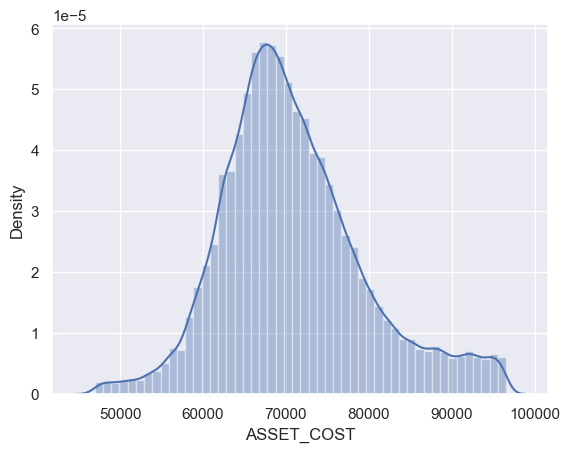

In [178]:
sns.distplot(train['ASSET_COST'])

In [179]:
#Action11 - split data to features and target
y_train = train['LOAN_DEFAULT']
x_train = train.drop(['LOAN_DEFAULT'], axis=1)

In [180]:
cols = x_train.columns
cols

Index(['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'EMPLOYMENT_TYPE',
       'MOBILENO_AVL_FLAG', 'PRI_CURRENT_BALANCE', 'PRIMARY_INSTAL_AMT',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'AGE'],
      dtype='object')

In [181]:
#Action12 - Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [182]:
x_train

array([[-0.80380788, -0.81556401, -0.29180962, ..., -0.44442465,
         1.0875267 , -0.91734133],
       [ 1.21148104,  0.50574899,  0.83462187, ...,  1.72839046,
        -0.29926099, -0.39821667],
       [ 0.28282377,  0.08392406,  0.30973002, ..., -0.58238117,
        -0.29926099,  2.50888139],
       ...,
       [-0.29853532, -0.95716602,  0.59303579, ...,  1.03860789,
         1.0875267 ,  1.67828194],
       [-1.5580909 , -0.72773636, -1.3988366 , ..., -0.58238117,
        -0.29926099,  0.84768249],
       [-0.44680364, -0.34856402, -0.40532597, ...,  0.4522927 ,
        -0.29926099, -0.5020416 ]])

In [183]:
#moving the scaled data into a tabular form, using the columns of the initial data
features = pd.DataFrame(x_train, columns=cols)
features

,DISBURSED_AMOUNT,ASSET_COST,LTV,EMPLOYMENT_TYPE,MOBILENO_AVL_FLAG,PRI_CURRENT_BALANCE,PRIMARY_INSTAL_AMT,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,AGE
0,-0.803808,-0.815564,-0.291810,-1.11283,0.0,-0.175374,-0.078105,-0.342400,-0.444425,1.087527,-0.917341
1,1.211481,0.505749,0.834622,-1.11283,0.0,-0.175177,-0.085818,1.297551,1.728390,-0.299261,-0.398217
2,0.282824,0.083924,0.309730,0.89861,0.0,-0.177864,-0.085818,-0.604792,-0.582381,-0.299261,2.508881
3,0.349762,-0.377802,1.056803,0.89861,0.0,-0.007235,-0.069540,-0.014410,0.245358,-0.299261,0.743858
4,0.735550,1.832107,-0.599371,0.89861,0.0,-0.177864,-0.085818,-0.604792,-0.582381,-0.299261,0.328558
...,...,...,...,...,...,...,...,...,...,...,...
156519,0.435666,-0.381356,0.773498,0.89861,0.0,2.267743,1.898820,0.313580,0.348825,-0.299261,-0.294392
156520,0.231281,0.117977,0.199124,0.89861,0.0,-0.103554,-0.048899,0.182384,0.210869,-0.299261,-0.813516
156521,-0.298535,-0.957166,0.593036,-1.11283,0.0,-0.177843,-0.085818,2.478316,1.038608,1.087527,1.678282
156522,-1.558091,-0.727736,-1.398837,0.89861,0.0,-0.177864,-0.085818,-0.604792,-0.582381,-0.299261,0.847682


In [184]:
#we need to check for multicolnearity, however this is to be done using only the numerical (contnuous) columns not categorcal cols
cont_features= ['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'PRI_CURRENT_BALANCE', 'PRIMARY_INSTAL_AMT',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'AGE']

<Axes: >

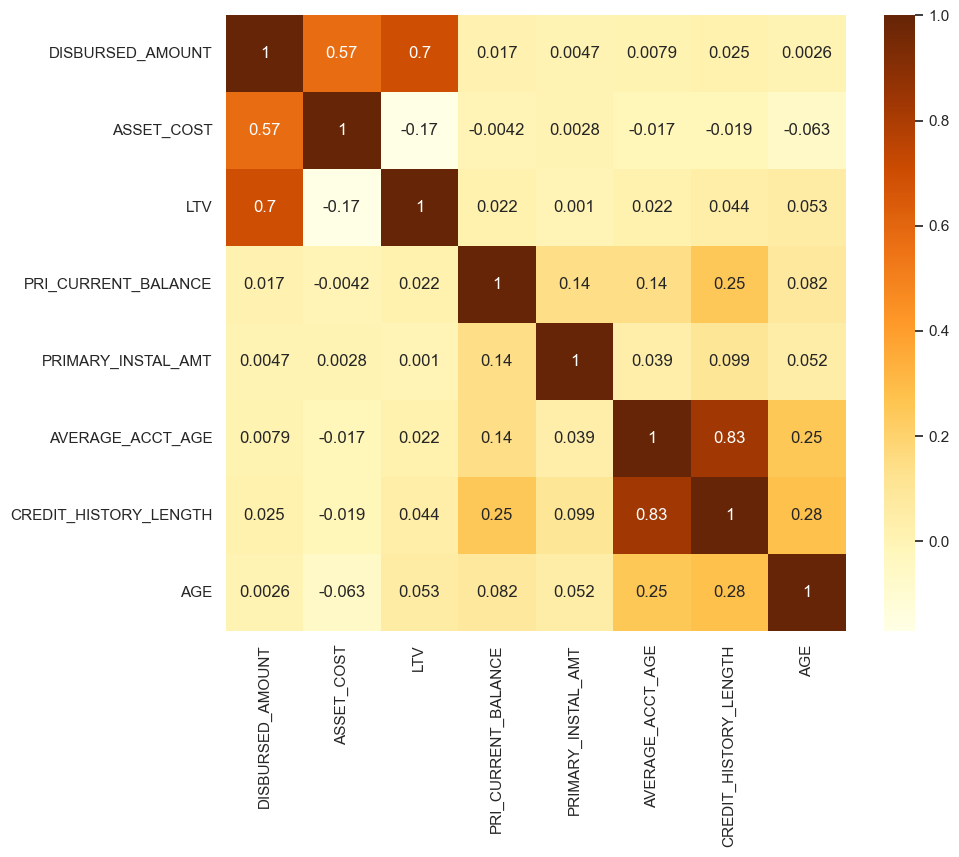

In [185]:
#checking for multcollnearity.
#im using a multicolnearity limit of 0.85, if there are 2 or more columns above 0.85, one of it would be dropped.
plt.figure(figsize=(10, 8))
corre = features[cont_features].corr()
sns.heatmap(corre, annot=True, cmap="YlOrBr")

In [186]:
#Feature Importance

In [187]:
decision_tree = DecisionTreeClassifier(max_depth = 10)
decision_tree.fit(x_train, y_train)
predictors = cols

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values(ascending=False)
coef.to_frame()

,0
LTV,0.324100
PRI_CURRENT_BALANCE,0.133971
ASSET_COST,0.093583
DISBURSED_AMOUNT,0.092064
AVERAGE_ACCT_AGE,0.081822
AGE,0.072312
PRIMARY_INSTAL_AMT,0.068769
CREDIT_HISTORY_LENGTH,0.062535
NO_OF_INQUIRIES,0.039763
EMPLOYMENT_TYPE,0.031081


In [188]:
#prepare pipeline for data transformation
def prepare(df): 
    df.drop(
         ['UNIQUEID','BRANCH_ID','SUPPLIER_ID','MANUFACTURER_ID','CURRENT_PINCODE_ID'], 
          axis=1, inplace=True
          )
    
    df1= df.dropna(subset=['EMPLOYMENT_TYPE']) 
    df1.reset_index(drop=True, inplace =True)
    
    df1['DATE_OF_BIRTH'] = pd.to_datetime(df1['DATE_OF_BIRTH'], format='mixed')
    
    df1['BIRTH_YEAR'] = df1['DATE_OF_BIRTH'].dt.year
    
    df1['AGE'] = 2023 - df1['BIRTH_YEAR']
    
    mon_conv(df1,'AVERAGE_ACCT_AGE')
    
    mon_conv(df1, 'CREDIT_HISTORY_LENGTH')
    
    df1['EMPLOYMENT_TYPE']=encoder.fit_transform(df1['EMPLOYMENT_TYPE'].values.reshape(-1,1))
    
    df1.drop(['DATE_OF_BIRTH','BIRTH_YEAR'], axis =1, inplace = True)
    
    df1 = drop_outlier(df1, 'DISBURSED_AMOUNT')

    df1 = drop_outlier(df1, 'ASSET_COST')
    
    y_test = df1['LOAN_DEFAULT']

    x_test = df1.drop(['LOAN_DEFAULT'], axis=1)
    
    x_test = scaler.transform(x_test)
    
    return x_test, y_test

In [189]:
x_test, y_test = prepare(test)

C:\Users\Godgive Computer\AppData\Local\Temp\ipykernel_344\393053609.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DATE_OF_BIRTH'] = pd.to_datetime(df1['DATE_OF_BIRTH'], format='mixed')
C:\Users\Godgive Computer\AppData\Local\Temp\ipykernel_344\393053609.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['BIRTH_YEAR'] = df1['DATE_OF_BIRTH'].dt.year
C:\Users\Godgive Computer\AppData\Local\Temp\ipykernel_344\393053609.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [190]:
x_train.shape

(156524, 11)

In [191]:
x_train

array([[-0.80380788, -0.81556401, -0.29180962, ..., -0.44442465,
         1.0875267 , -0.91734133],
       [ 1.21148104,  0.50574899,  0.83462187, ...,  1.72839046,
        -0.29926099, -0.39821667],
       [ 0.28282377,  0.08392406,  0.30973002, ..., -0.58238117,
        -0.29926099,  2.50888139],
       ...,
       [-0.29853532, -0.95716602,  0.59303579, ...,  1.03860789,
         1.0875267 ,  1.67828194],
       [-1.5580909 , -0.72773636, -1.3988366 , ..., -0.58238117,
        -0.29926099,  0.84768249],
       [-0.44680364, -0.34856402, -0.40532597, ...,  0.4522927 ,
        -0.29926099, -0.5020416 ]])

In [192]:
y_test

0        1
1        0
2        0
3        0
4        0
        ..
39147    0
39148    0
39149    0
39150    0
39151    0
Name: LOAN_DEFAULT, Length: 39152, dtype: int64

In [193]:
## Model Building

In [194]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay

In [195]:
#creating a function to determine models to apply
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeClassifier()
    elif input_ml_algo == 'RF':
        model = RandomForestClassifier()
    elif input_ml_algo == 'XGBC':
        model = XGBClassifier()
    elif input_ml_algo == 'LGBMC':
        model = LGBMClassifier()
    elif input_ml_algo == 'LR':
        model = LogisticRegression()
    return model

In [196]:
def performance(model, x_train, y_train, x_test, y_test):
    y_pred = model.predict(x_test)
    
    #predict probability for test dataset
    y_pred_prob = model.predict_proba(x_test)
    y_pred_prob = [x[1] for x in y_pred_prob]
    
    disp = ConfusionMatrixDisplay.from_estimator(
    model, x_test, y_test,
    cmap ='Blues', values_format='d',
    display_labels=['Fully-Paid', 'Defaulted']
)
    
    print ("\n Accuracy Score : \n ", accuracy_score(y_test,y_pred))
    print ("\n AUC Score : \n ", roc_auc_score(y_test, y_pred))
    print ("\n Confusion Matrix : \n ", confusion_matrix(y_test, y_pred))
    print ("\n Classification Report : \n ", classification_report(y_test, y_pred))
    
    print ("\n ROC curve : \n")
    sns.set_style("white")
    RocCurveDisplay.from_estimator(model, x_test, y_test)
    plt.show()


 Accuracy Score : 
  0.7815437270126686

 AUC Score : 
  0.5003206680239917

 Confusion Matrix : 
  [[30591     9]
 [ 8544     8]]

 Classification Report : 
                precision    recall  f1-score   support

           0       0.78      1.00      0.88     30600
           1       0.47      0.00      0.00      8552

    accuracy                           0.78     39152
   macro avg       0.63      0.50      0.44     39152
weighted avg       0.71      0.78      0.69     39152


 ROC curve : 



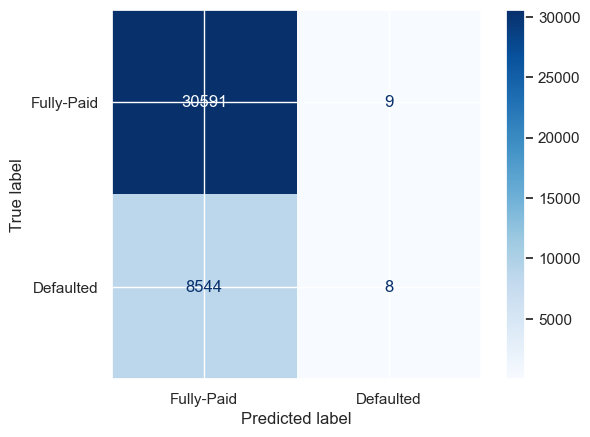

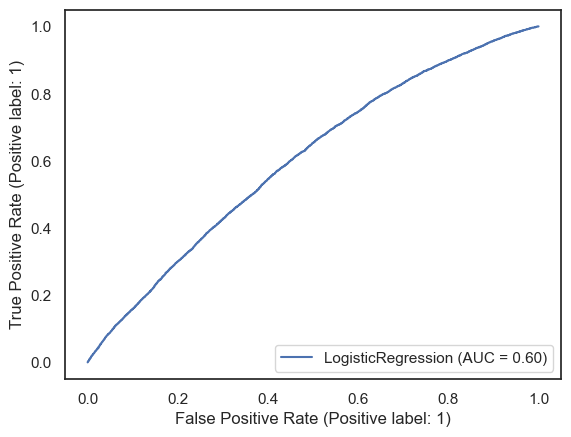

In [197]:
model = model_to_use("LR")
model.fit(x_train, y_train)
performance(model, x_train, y_train, x_test, y_test)

[LightGBM] [Info] Number of positive: 33687, number of negative: 122837
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1762
[LightGBM] [Info] Number of data points in the train set: 156524, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.215219 -> initscore=-1.293746
[LightGBM] [Info] Start training from score -1.293746

 Accuracy Score : 
  0.7816458929301185

 AUC Score : 
  0.5002596495411386

 Confusion Matrix : 
  [[30598     2]
 [ 8547     5]]

 Classification Report : 
                precision    recall  f1-score   support

           0       0.78      1.00      0.88     30600
           1       0.71      0.00      0.00      8552

    accuracy                           0.78     39152
   macro avg       0.75      0.50      0.44     39152
weighte

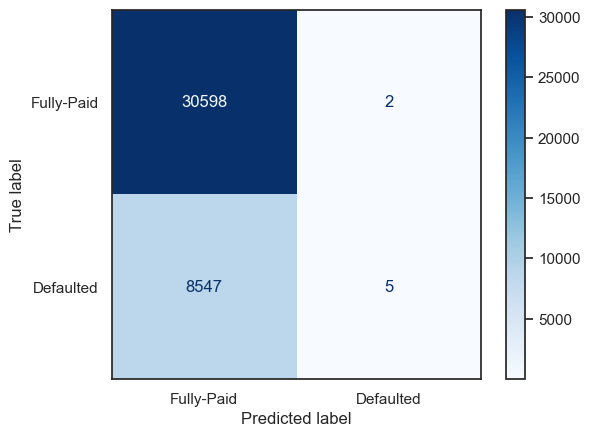

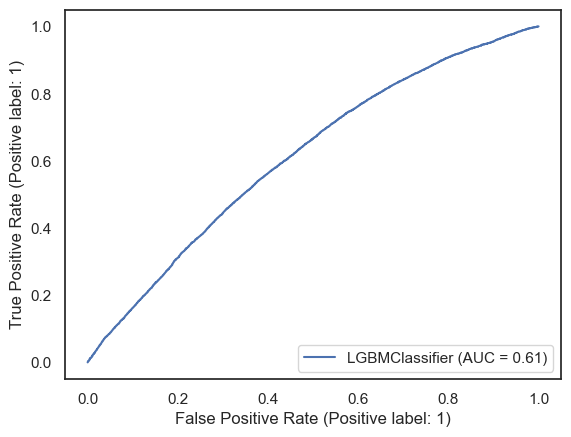

In [198]:
model = model_to_use("LGBMC")
model.fit(x_train, y_train)
performance(model, x_train, y_train, x_test, y_test)


 Accuracy Score : 
  0.7801644871270944

 AUC Score : 
  0.5015446144157694

 Confusion Matrix : 
  [[30487   113]
 [ 8494    58]]

 Classification Report : 
                precision    recall  f1-score   support

           0       0.78      1.00      0.88     30600
           1       0.34      0.01      0.01      8552

    accuracy                           0.78     39152
   macro avg       0.56      0.50      0.44     39152
weighted avg       0.69      0.78      0.69     39152


 ROC curve : 



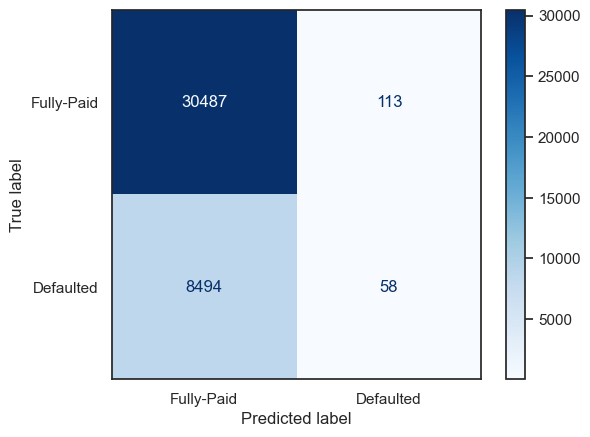

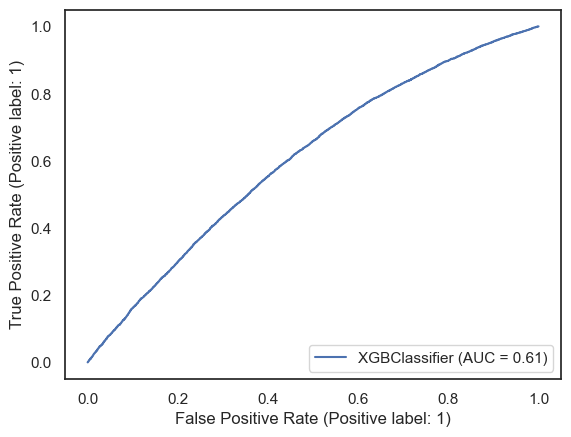

In [199]:
model = model_to_use("XGBC")
model.fit(x_train, y_train)
performance(model, x_train, y_train, x_test, y_test)


 Accuracy Score : 
  0.770918471597875

 AUC Score : 
  0.5066665902407111

 Confusion Matrix : 
  [[29863   737]
 [ 8232   320]]

 Classification Report : 
                precision    recall  f1-score   support

           0       0.78      0.98      0.87     30600
           1       0.30      0.04      0.07      8552

    accuracy                           0.77     39152
   macro avg       0.54      0.51      0.47     39152
weighted avg       0.68      0.77      0.69     39152


 ROC curve : 



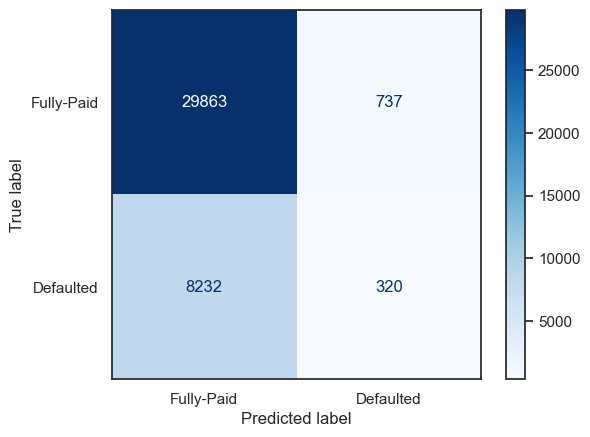

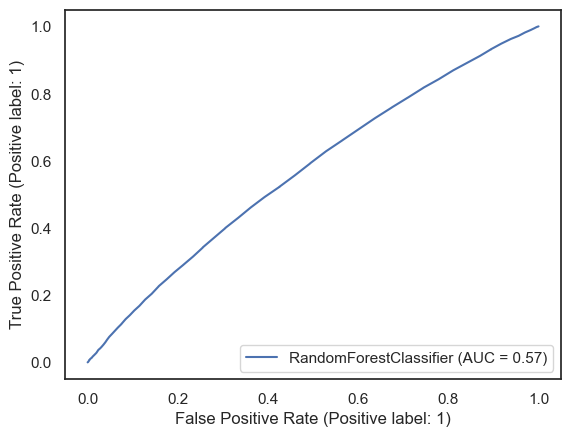

In [200]:
model = model_to_use("RF")
model.fit(x_train, y_train)
performance(model, x_train, y_train, x_test, y_test)


 Accuracy Score : 
  0.6572844299141807

 AUC Score : 
  0.5135886265950098

 Confusion Matrix : 
  [[23524  7076]
 [ 6342  2210]]

 Classification Report : 
                precision    recall  f1-score   support

           0       0.79      0.77      0.78     30600
           1       0.24      0.26      0.25      8552

    accuracy                           0.66     39152
   macro avg       0.51      0.51      0.51     39152
weighted avg       0.67      0.66      0.66     39152


 ROC curve : 



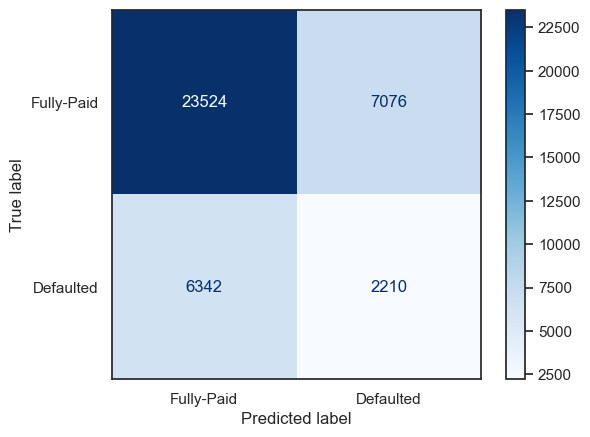

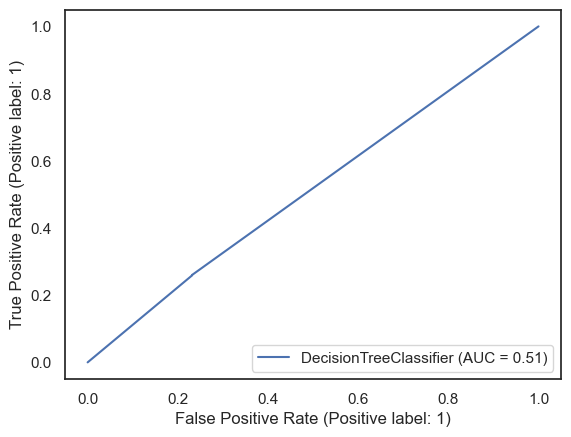

In [201]:
model = model_to_use("DT")
model.fit(x_train, y_train)
performance(model, x_train, y_train, x_test, y_test)